In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [18]:
from wall_utils.process_apartment import process_apartment
from utils.swiss_fp_data.fp_utils import Mapping
import pickle

with open('data/swiss-data/0a0f050.pkl', 'rb') as f:
    example = pickle.load(f)

In [27]:
wall_fillet = process_apartment(example)
# wall_triangles = get_wall_triangles(example, min_area=1.0)

Space TOILET-1 is too small.


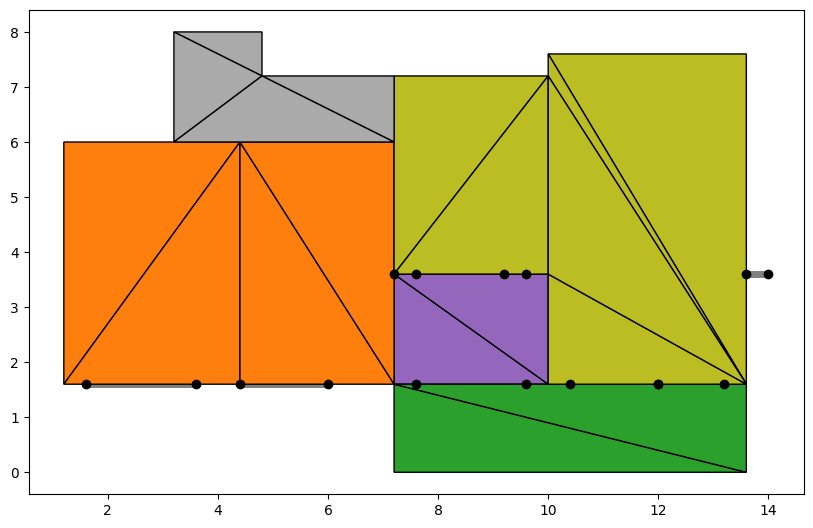

In [28]:
import matplotlib.pyplot as plt
import shapely.plotting


fig, ax = plt.figure(figsize=(10, 10)), plt.gca()
ax.set_aspect('equal', adjustable='box')

# for p in wall_fillet["wall_polygons"]:
#     shapely.plotting.plot_polygon(p, ax=ax, facecolor="lightblue", edgecolor="black", add_points=False, alpha=1.0, linewidth=1)
    
# # for p in wall_fillet["walls"]:
# #     shapely.plotting.plot_polygon(p, ax=ax, facecolor="lightblue", edgecolor="black", add_points=False, alpha=1.0, linewidth=1)
    
# for p, t in wall_fillet["wall_lines"]:
#     shapely.plotting.plot_line(p, ax=ax, color="black", linewidth=t*1, zorder=1, add_points=True, linestyle="-", alpha=0.5)
    # shapely.plotting.plot_polygon(p, ax=ax, facecolor="lightblue", edgecolor="black", add_points=False, alpha=1.0, linewidth=1)

# # shapely.plotting.plot_polygon(wall_fillet["perimeter"], ax=ax, facecolor="lightblue", edgecolor="black", add_points=False, alpha=1.0, linewidth=1)
# # for s in wall_fillet["spaces"]:
# #     shapely.plotting.plot_polygon(wall_fillet["spaces"][s], ax=ax, facecolor="white", edgecolor="black", add_points=False, alpha=1.0, linewidth=1)


# # for p in wall_triangles:
# #     shapely.plotting.plot_polygon(p, ax=ax, facecolor="red", edgecolor="black", add_points=False, alpha=1.0, linewidth=1)



spaces = wall_fillet["centerlines"]["spaces"]
# for s in spaces:
#     shapely.plotting.plot_polygon(spaces[s], ax=ax, facecolor=Mapping.IndexToColor[Mapping.NameToIndex[s.split('-')[0]]], edgecolor="black", add_points=False, alpha=0.4, linewidth=1)

dws = wall_fillet["centerlines"]["door_windows"]
for d in dws:
    shapely.plotting.plot_line(dws[d], ax=ax, color="black", linewidth=5, zorder=1, add_points=True, linestyle="-", alpha=0.5)

triangles = wall_fillet["centerlines"]["triangles"]
for t in triangles:
    facecolor=Mapping.IndexToColor[Mapping.NameToIndex[t.split('-')[0]]]
    for p in triangles[t]:
        shapely.plotting.plot_polygon(p, ax=ax, facecolor=facecolor, edgecolor="black", add_points=False, alpha=1.0, linewidth=1)

internal = wall_fillet["centerlines"]["internal"]
for i in internal:
    shapely.plotting.plot_line(i, ax=ax, color="black", linewidth=5, zorder=1, add_points=True, linestyle="-", alpha=0.5)
plt.show()

In [6]:
wall_fillet["centerlines"]["spaces"]

{'TOILET-1': <POLYGON ((4.85 8.156, 7.434 8.156, 7.434 7.109, 7.384 7.109, 7.384 7.059, 4...>,
 'KITCHEN-1': <POLYGON ((7.384 1.425, 7.384 3.849, 10.225 3.849, 10.225 1.425, 7.384 1.425))>,
 'TERRACE-1': <POLYGON ((7.384 1.425, 13.825 1.425, 13.825 0, 7.384 0, 7.384 1.425))>,
 'BEDROOM-1': <POLYGON ((0.925 5.965, 3.125 5.965, 3.125 5.915, 4.45 5.915, 4.45 1.425, 0....>,
 'BEDROOM-2': <POLYGON ((4.45 1.425, 4.45 5.915, 7.384 5.915, 7.384 3.849, 7.384 1.425, 4....>,
 'LIVING_DINING-1': <POLYGON ((7.434 7.109, 10.175 7.109, 10.175 7.637, 13.825 7.637, 13.825 1.4...>,
 'CORRIDOR-1': <POLYGON ((3.125 8.156, 4.85 8.156, 4.85 7.059, 7.384 7.059, 7.384 5.915, 4....>}

In [49]:
example["boundaries"]

{'INTERNAL-2': array([[3025, 6065,    0],
        [3025, 8256,    0],
        [3225, 8256,    0],
        [3225, 5865,    0],
        [1025, 5865,    0],
        [1025, 1275,    0],
        [ 825, 1275,    0],
        [ 825, 6065,    0],
        [3025, 6065,    0]], dtype=int32),
 'EXTENDED_BOUNDARY-1': array([[  825.,  1275.,     0.],
        [13975.,  1275.,     0.],
        [13975.,  8256.,     0.],
        [  825.,  8256.,     0.],
        [  825.,  1275.,     0.]])}